2번째 핸즈온은 특정 큐비트나 특정 게이트에만 특정 노이즈 인가



이 접근 방식은 실제 양자 하드웨어의 특성을 모델링하는 데 유용할 수 있습니다. 이를 통해 더 정확한 양자 회로 시뮬레이션과 오류 분석이 가능해집니다

In [1]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

#import boto3
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise
from braket.devices import LocalSimulator
from braket.circuits import Circuit, Noise, Gate

In [2]:
# 노이즈 시뮬레이터 디바이스 선택
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")
#device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

In [3]:
# 간단한 양자 회로 생성
circuit = Circuit().h(0).cnot(0, 1)

In [4]:

#10% 확률로 발생하는 비트 플립 노이즈 모델을 생성
noise1 = Noise.BitFlip(probability=0.1)

#20% 확률로 발생하는 위상 플립 노이즈 모델을 생성
noise2 = Noise.PhaseFlip(probability=0.2)

#비트 플립 노이즈(noise1)를 0번에 붙은 모든 게이트에 적용
circuit.apply_gate_noise(noise1, target_qubits=[0])

#위상 플립 노이즈(noise2)를 Hadamard 게이트에만 적용
circuit.apply_gate_noise(noise2, target_gates=[Gate.H])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': PhaseFlip(0.2), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1)])

In [5]:
print(circuit)

T  : │              0              │        1        │
      ┌───┐ ┌─────────┐ ┌─────────┐       ┌─────────┐ 
q0 : ─┤ H ├─┤ PF(0.2) ├─┤ BF(0.1) ├───●───┤ BF(0.1) ├─
      └───┘ └─────────┘ └─────────┘   │   └─────────┘ 
                                    ┌─┴─┐             
q1 : ───────────────────────────────┤ X ├─────────────
                                    └───┘             
T  : │              0              │        1        │


In [6]:
result = device.run(circuit, shots=1000).result()
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 455, '00': 441, '01': 56, '10': 48})


In [7]:
# 결과 출력
print(result.measurement_counts)

Counter({'11': 455, '00': 441, '01': 56, '10': 48})


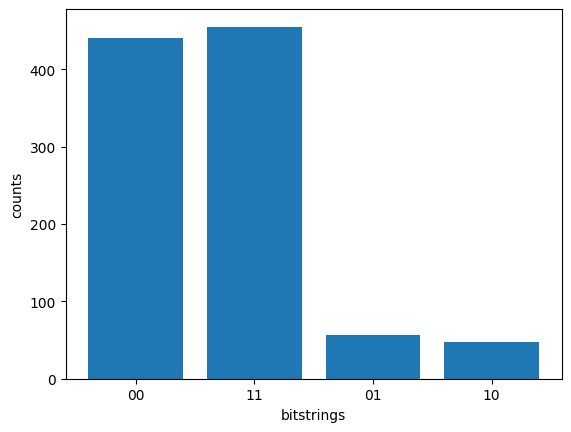

In [8]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');